## Notes on numpy

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
np.__version__

'1.18.1'

In [61]:
A = np.arange(6).reshape(3, 2)

x = np.array([2, 4]).reshape(2, 1)

In [63]:
x

array([[2],
       [4]])

In [65]:
A@x

array([[ 4],
       [16],
       [28]])

In [66]:
A.dot(x)

array([[ 4],
       [16],
       [28]])

In [37]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [33]:
x.size

10

## Rotating a matrix

In [280]:
def rotate(deg, vector):
    """ Rotate vector by a specific amount of degrees
        in the anti-clockwise direction. """
    theta = np.radians(deg)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    
    return R.dot(vector)

In [288]:
def getCol(arr, stop):
    """ Generator for getting vectors out of matrix. """
    i = 0
    while i < stop:
        yield arr[:,i]
        i +=1

def plotVect(vects, xbounds, ybounds, startx=0, starty=0, 
             title='Vectors', size=(5, 5)):
    """ 
    Plot a vector using matplotlib

    vects (dictionary or list): 
        if dictionary: {description (string), vector (np.array)}
        if list: [np.array(), np.array()]
        
    xbounds (tuple): lower and upper bound for x axis
    ybounds (tuple): lower and upper bound for y axis
    startx, starty (int): base of vectors to draw from
    title (string): Title of the plot
    size (tuple): width, height of plot. 
    """
    ax = plt.axes()
    plt.rcParams["figure.figsize"] = size
    
    colors = ['red', 'blue', 'green', 'orange', 'yellow']
    
    ax.axhline(y=0, color='black', zorder=1)
    ax.axvline(x=0, color='black')
    
    i = 0
 
    if isinstance(vects, dict):
        for descr, vect in vects.items():
            x, y = vect[0], vect[1]
            
            ax.arrow(startx, starty, 
                     x, y, 
                     head_width=0.2, 
                     head_length=0.2, 
                     facecolor=colors[i], 
                     edgecolor=colors[i],
                     length_includes_head=True,
                     zorder = 10+i,
                     width=.05)

            plt.annotate(descr, xy=(x+.2, y+.2))
            i += 1
            
    if isinstance(vects, list):
        for vect in vects:
            x, y = vect[0], vect[1]

            ax.arrow(startx, starty, 
                     x, y, 
                     head_width=0.2, 
                     head_length=0.2, 
                     facecolor=colors[i], 
                     edgecolor=colors[i],
                     length_includes_head=True,
                     zorder = 10+i,
                     width=.05)
            i += 1

    
    
    plt.title(title)
    plt.grid()
    
    plt.xlim(xbounds[0], xbounds[1])
    plt.ylim(ybounds[0], ybounds[1])
    
    plt.gca().set_aspect('equal', adjustable='box')  # Equal scales on axes
    
    return ax

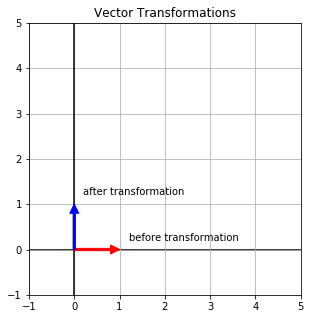

In [289]:
before = np.array([1, 0])
after = rotate(90, before)

plotVect({'before transformation':before,
          'after transformation':after},
         xbounds=(-1, 5),
         ybounds=(-1, 5),
         title='Vector Transformations');

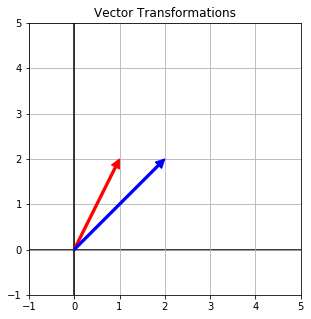

In [290]:
plotVect([np.array([1, 2]), np.array([2, 2])],
         xbounds=(-1, 5),
         ybounds=(-1, 5),
         title='Vector Transformations');

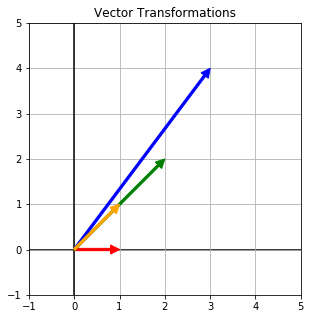

In [284]:
x = np.array([1, 3, 2, 1,
              0, 4, 2, 1]).reshape(2, 4)


plotVect([z for z in getCol(x, x.shape[1])],
         xbounds=(-1, 5),
         ybounds=(-1, 5),
         title='Vector Transformations');

In [286]:
[rotate(90, z) for z in getCol(x, x.shape[1])]

[array([6.123234e-17, 1.000000e+00]),
 array([-4.,  3.]),
 array([-2.,  2.]),
 array([-1.,  1.])]

IndexError: list index out of range

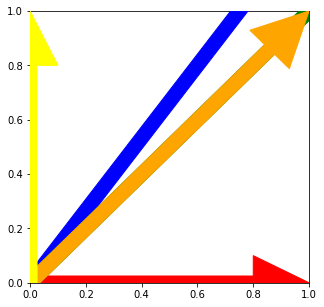

In [287]:
plotVect([z for z in getCol(x, x.shape[1])]+
         [rotate(90, z) for z in getCol(x, x.shape[1])],
         xbounds=(-10, 10),
         ybounds=(-10, 10),
         title='Vector Transformations');